

# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
Patients noshow appointments-may-2016.csv renamed in this analysis to: 'noshowdataset.csv'
is a dataset that collects information
from little over 100k medical appointments in different neighborhood all over
Brazil.

These patients have different illnesses like Hipertension, Diabetes and some are Handicap. There are pateients suffering from Alcoholism they all have appointments some have multiples, with the aid of SMS campaign its expected that they will respond and show up, some have Scholarship (welfare), this also is expect to aid the people with it to respond and show up for their appoinments.

This dataset focuses on the question
of whether or not patients show up
for their appointment. 

Some other
characteristics about each patient are
included in each row:

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

We shall dive into the dataset and depending on the state of it, we will try to first check and make some cleaning, this is because depending on the source of this dataset, weither its from a third party or generated within there are different levels and depth of the error(s) like ommission, duplicates, wrong spellings etc that might be in this dataset that will not help our analysis. A good dataset will help give a good and acurate analysis a dirty dataset cant do this no matter the effort of the analyst.

Yes..lets go




### Question for Analysis
We will be investigating what factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?
 

<a id='wrangling'></a>
## Data Wrangling

After importing the packages needed, we will connect to database and load our data in. Its csv file that have been renamed to 'noshowdataset.csv' after this we will 
 view sme lines, check them for errors and clean them by checking for null values, duplications, datatypes etc



In [125]:
#we start by importing all packages we will be using for our analysis
import pandas as pd # linear algebra
import numpy as np # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Graphs and plots 
import seaborn as sns # this is another library on top of matplotlib for plotting
#loading dataset
%matplotlib inline

In [190]:
#reading the dataset in: 
df= pd.read_csv('noshowdataset.csv')
#we will view some lines of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We can see that the dataset has 14 columns, however we dont know how many rows yet, so we can do that next:

In [192]:
#we want to know the number of rows and correct overall information summary of our data:
#to count how many rows and columns
df.count(), 
df.shape, 
# brief information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can now see that our dataset have:

110527 rows and 14 columns; 

issues in the information about our dataset like; 

incorrect spellings for both 'Hypertention and Handicap' columns also that 'No-Show' column need to be attended to;


there is an issue with the PatientId column been a float, this wont help us during our analysis, so we need to change it too;


This seem to do it however, let's try check further to be sure of the readiness of this dataset for analysis:

In [193]:
#let see the statistical summary of our dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we can see that:
    Mean Age is 37
    Most of the patients are between the ages of 37 and 55 years;
    Max age is 115 years and Min Age here must have been a mistake, at -1year.

In [194]:
#lets check for duplicates
print ('There are',df.duplicated().sum(),'duplicate values in this dataset')

There are 0 duplicate values in this dataset


No duplicates, however, this been a medical data, there might be patients with multiple or more than one appointments, lets check this..

In [195]:
#will also be changing the datatype from float to int
df.PatientId = df.PatientId.apply('int64')

#to check if there are patients with one more than one appointments we have to check the uniqueness of this column, 
df.PatientId.value_counts()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
                   ..
862263621811        1
9267587227475       1
5764355598913       1
5712491287569       1
15576631729893      1
Name: PatientId, Length: 62299, dtype: int64

We can see PatientIds are actually 62299 patients but some of them have multiple appointments like one with 88, another with 84 aonther with 70 appointments and so on, we have also changed the datatype from float to int to help our analysis ..

In [196]:
#lets check for unique values
col= df.columns
for x in col[5:]:
    print(x +':', sorted(df[x].unique()))

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Neighbourhood: ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'J

we see the -1 Age, in the Handicap column..we have some 2,3 and 4s which should not be, as we expect only 0s and 1s in the column

In [197]:
#To know how many people are with the -1 years
df.Age.value_counts() , df.Handcap.value_counts() #also to count the Handicap column

( 0      3539
  1      2273
  52     1746
  49     1652
  53     1651
         ... 
  115       5
  100       4
  102       2
  99        1
 -1         1
 Name: Age, Length: 104, dtype: int64,
 0    108286
 1      2042
 2       183
 3        13
 4         3
 Name: Handcap, dtype: int64)

We have one record of -1 so we will drop this one

For the Handcap column, we have 183 rows with 2s, 13 rows with 3s and 3 rows with 4s in total we have to remove these 199 rows cuase its hard to accertain if they are 1 or 0

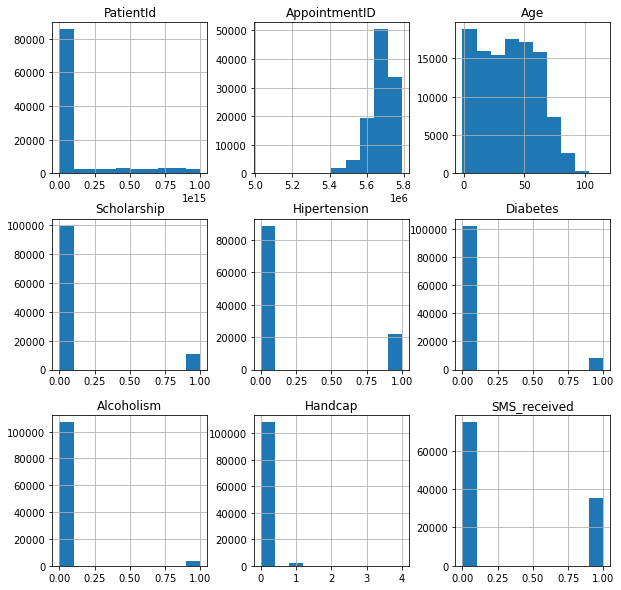

In [198]:
#lets view the histogram
df.hist(figsize=(10,10));

we will check this again after we have cleaned this data up


#### Data Cleaning
After seeing all errors, we are at this stage coming to clean all these errors

In [199]:
#veiw the summary information
df.info()
# get the number of null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Let us start by renaming all column heads with errors :

In [200]:
#renaming incorrect the columns
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)
#lets view them to vefify
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Let us check for the particular row with the -1 age;

In [201]:
#we need to fix the row with the -1 Age:
df.query('Age==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


We can see row number 99832 is the row having the -1 value as age, this is not right so we are going to delete this row...

In [202]:
## we fix any age with -1 values assuming no one will be age -1 old
df.drop(index=99832, inplace=True)
# then lets veiw to verify
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see the -1 age is no more in our dataset.

Now we might not be needing some columns like the PatientId and the AppointmentId, so let us drop all the columns we wont be needing

In [203]:
#dropping columns PatientId, AppointmentId, ScheduledDay and AppointmentDay
df.drop(['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace= True)
# lets view to verify
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Yes our data is gettng better however, we still have the 199 rows containing the 2,3 and 4s to remove

In [204]:
#we need to drop the 2,3 and 4s in the handicap column
df.drop(df[df['Handicap'].isin([2,3,4])].index,inplace = True)

Now we have removed all 2,3 and 4s in this column

In [205]:
#lets check our numeric columns again
col= df.columns
for x in col[5:]:
    print(x +':', sorted(df[x].unique()))

Diabetes: [0, 1]
Alcoholism: [0, 1]
Handicap: [0, 1]
SMS_received: [0, 1]
No_show: ['No', 'Yes']


we can see the Handicap column is now ok

In [206]:
# let view our data from the top
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [207]:
#lets view it from the end
df.tail()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,F,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [208]:
#let us check our dataset
df.info(), df.shape, df.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110327 non-null  object
 1   Age            110327 non-null  int64 
 2   Neighbourhood  110327 non-null  object
 3   Scholarship    110327 non-null  int64 
 4   Hypertension   110327 non-null  int64 
 5   Diabetes       110327 non-null  int64 
 6   Alcoholism     110327 non-null  int64 
 7   Handicap       110327 non-null  int64 
 8   SMS_received   110327 non-null  int64 
 9   No_show        110327 non-null  object
dtypes: int64(7), object(3)
memory usage: 9.3+ MB


(None,
 (110327, 10),
 Gender           110327
 Age              110327
 Neighbourhood    110327
 Scholarship      110327
 Hypertension     110327
 Diabetes         110327
 Alcoholism       110327
 Handicap         110327
 SMS_received     110327
 No_show          110327
 dtype: int64)

We are now left with 110327 rows and 10 columns to work with

<a id='eda'></a>
## Exploratory Data Analysis




###  What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment

Then we will look into two important variables in this dataset that may cause no shows: gender and age

In [209]:
# Checking number of rows and columns
print ('There are', df.shape[0], 'rows and ', df.shape[1], 'columns')

There are 110327 rows and  10 columns


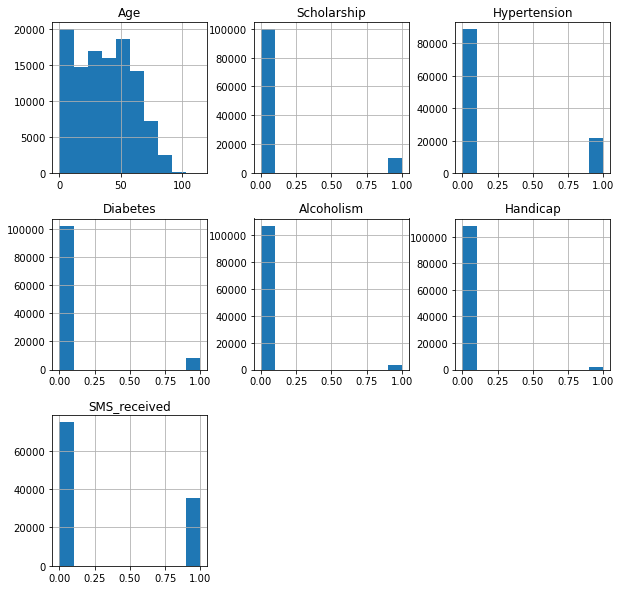

In [210]:
#lets view the histogram
df.hist(figsize=(10,10));

We can see from the graph that:

*close to 20% patients have hypertention

*most patients didnt have chronic disease and arent handicaped

*half of the people received sms

*about 10% (10000 of the 110000) received the welfare program

In [211]:
#lets see the data in group of those that showed and those that didnt
show = df.No_show == 'No'
noshow = df.No_show == 'Yes'
#count show
df[show].count(), df[noshow].count()

(Gender           88049
 Age              88049
 Neighbourhood    88049
 Scholarship      88049
 Hypertension     88049
 Diabetes         88049
 Alcoholism       88049
 Handicap         88049
 SMS_received     88049
 No_show          88049
 dtype: int64,
 Gender           22278
 Age              22278
 Neighbourhood    22278
 Scholarship      22278
 Hypertension     22278
 Diabetes         22278
 Alcoholism       22278
 Handicap         22278
 SMS_received     22278
 No_show          22278
 dtype: int64)

we can see that the number of patients that showed up is almost 4 times those that didnt show

In [212]:
def Gendercountornot(showingornot,y_axis): # Function to count Number of Gender With show
    plt.figure(figsize=[15,8])
    df['Gender'][showingornot].value_counts(normalize=True).plot(label='show',kind='pie')
    plt.legend();
    plt.titles ('Does Gender Count?')
    plt.xlabel('Gender')
    plt.ylabel(y_axis);

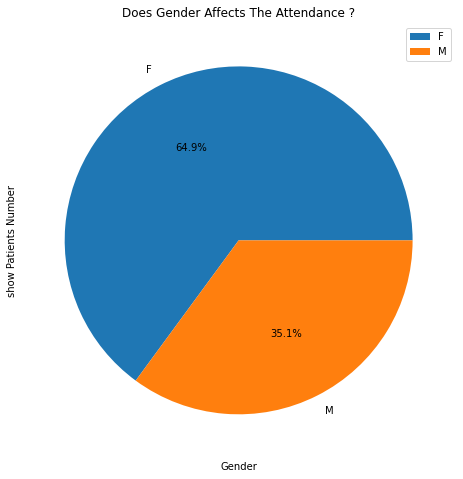

In [213]:
# Use Of Gendercountornot Function With show Patients
y_axis='show Patients Number'
Gender_Affect(show,y_axis);

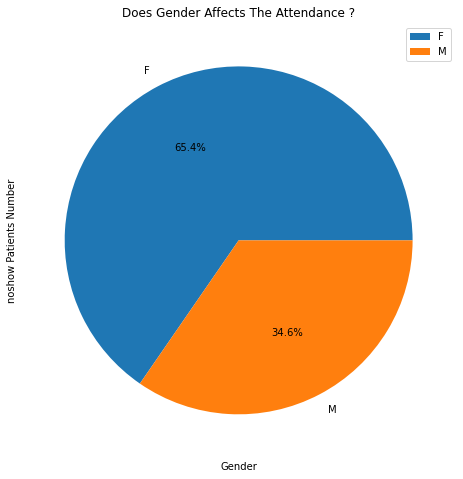

In [214]:
# Use Of Gendercountornot Function With noshow Patients
y_axis='noshow Patients Number'
Gender_Affect(noshow,y_axis);

,mean,std
No_show,,
No,37.777090,23.330356
Yes,34.279109,21.935121


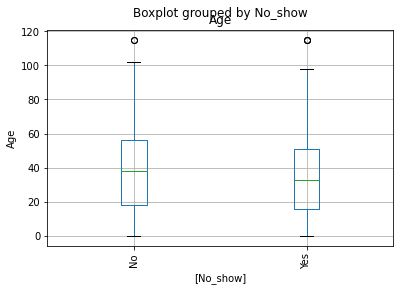

In [215]:
#lets see relationship of Age to not showing up in this boxplot
df.boxplot(column=['Age'], by = ['No_show'],rot=90)
plt.ylabel("Age")
pd.DataFrame(df.groupby(['No_show'])['Age'].describe().loc[:,['mean','std']])

#### Factors that influence the attendance

In [216]:
# showed and noshow according Gender

print(df.Gender[show].value_counts()),
#count noshow
print(df.Gender[noshow].value_counts()),
#count gender
df.groupby('Gender').No_show.value_counts()

F    57162
M    30887
Name: Gender, dtype: int64
F    14568
M     7710
Name: Gender, dtype: int64


Gender  No_show
F       No         57162
        Yes        14568
M       No         30887
        Yes         7710
Name: No_show, dtype: int64

In [217]:
# Getting Summary statistics of Age
df['Age'].describe()

count    110327.000000
mean         37.070753
std          23.098052
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

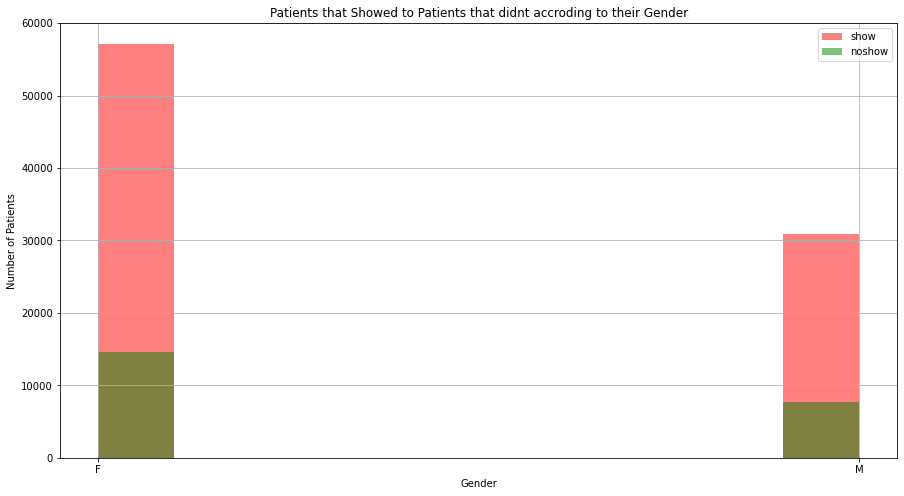

In [218]:
plt.figure(figsize=[15, 8]) 
df.Gender[show].hist(alpha= 0.5, color ='red', label = 'show')
df.Gender[noshow].hist(alpha = 0.5, color = 'green', label = 'noshow')
plt.legend()
plt.title ('Patients that Showed to Patients that didnt accroding to their Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients');

Gender seem to not help here and we see that Females that showed were more than the male that did, and at thesame time Females that didnt show were more that male that didnt show.

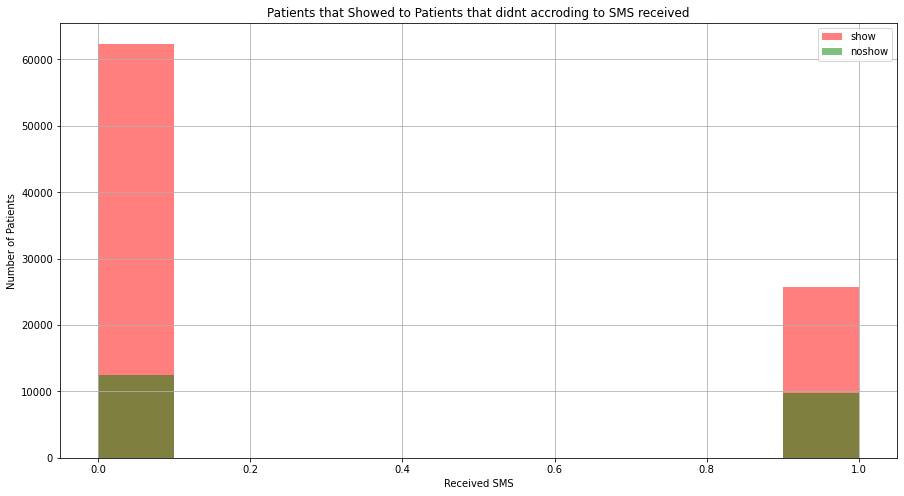

In [220]:
## showed and noshow according SMS the received
plt.figure(figsize=[15, 8]) 
df.SMS_received[show].hist(alpha= 0.5, color ='red', label = 'show')
df.SMS_received[noshow].hist(alpha = 0.5, color = 'green', label = 'noshow')
plt.legend()
plt.title ('Patients that Showed to Patients that didnt accroding to SMS received')
plt.xlabel('Received SMS')
plt.ylabel('Number of Patients');

we can see that even without SMS receieed more people showed up

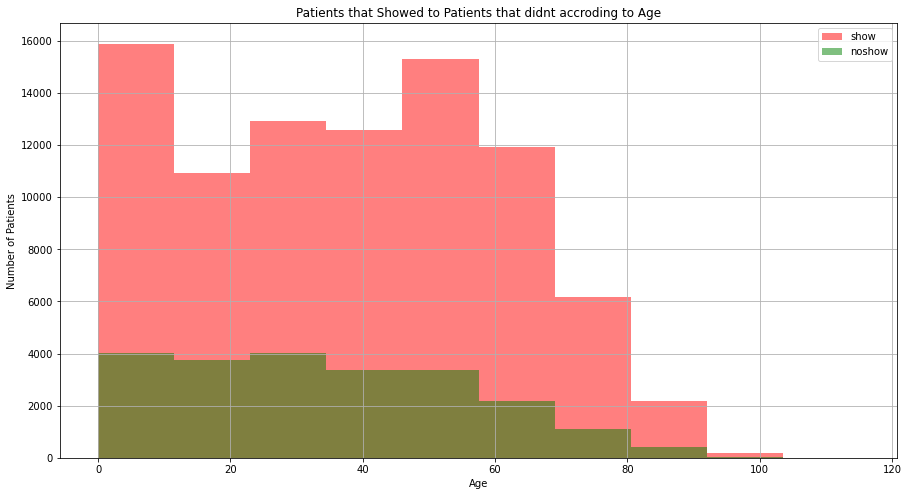

In [221]:
## showed and noshow according Age.
plt.figure(figsize=[15, 8]) 
df.Age[show].hist(alpha= 0.5, color ='red', label = 'show')
df.Age[noshow].hist(alpha = 0.5, color = 'green', label = 'noshow')
plt.legend()
plt.title ('Patients that Showed to Patients that didnt accroding to Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients');

**we can see that patients between ages 0 to 10 showed more, this wouldnt be a surprise cause parents would bring them. 
next are poeple between ages 35-70.

**we can see from 60 it started to decline, this means the older the less the show.

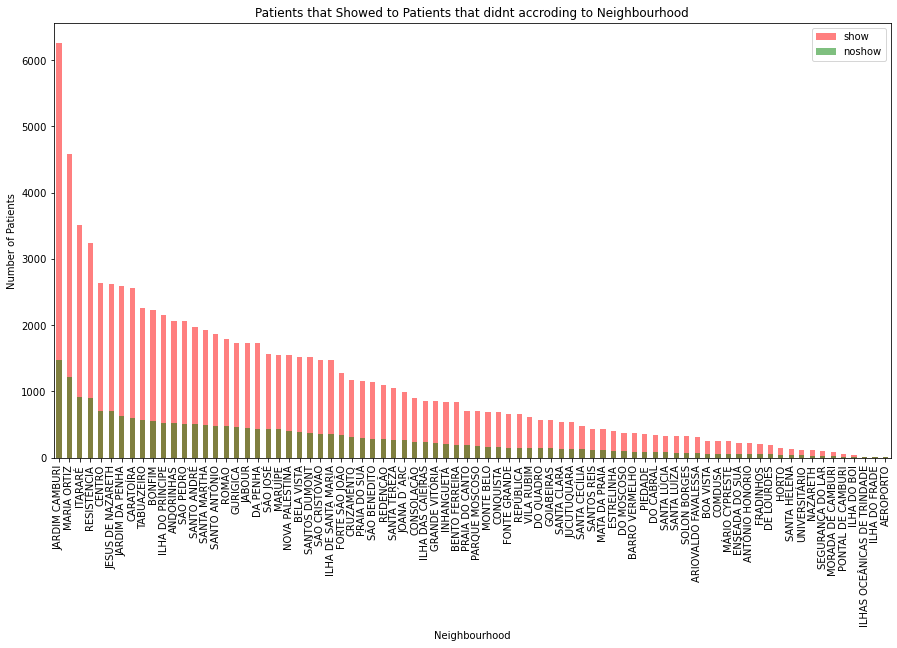

In [222]:
## showed and noshow according Neighbourhood.
plt.figure(figsize=[15, 8]) 
df.Neighbourhood[show].value_counts().plot(kind= 'bar', alpha= 0.5, color ='red', label = 'show')
df.Neighbourhood[noshow].value_counts().plot(kind= 'bar', alpha = 0.5, color = 'green', label = 'noshow')
plt.legend()
plt.title ('Patients that Showed to Patients that didnt accroding to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patients');

we can see that Neighbourhood as a great effect on attendance, Jardim Camburi is the most populous and with the highest number that show

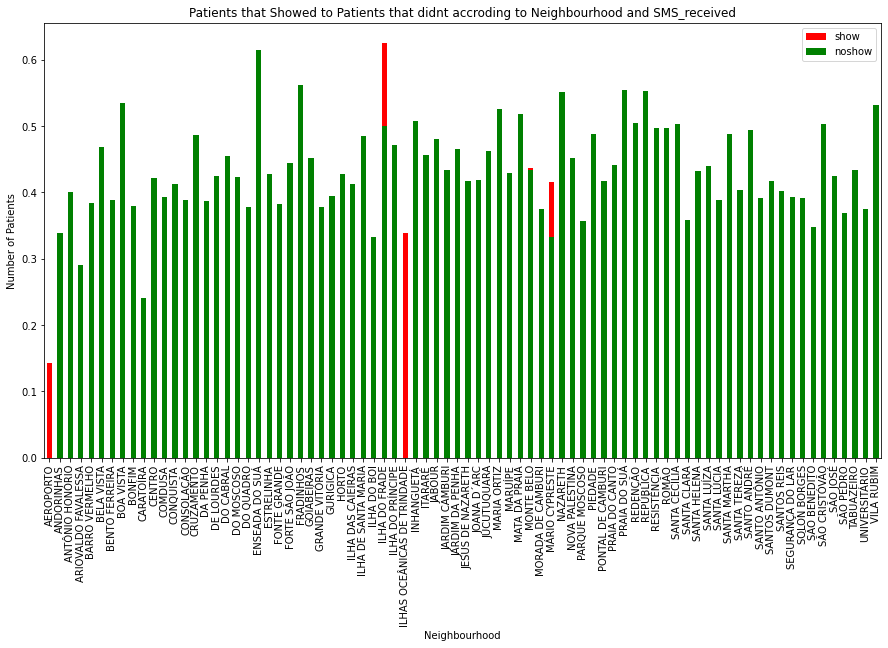

In [223]:
#let see comparison between the  Neighbourhood and SMS received to showing up
plt.figure(figsize=[15, 8]) 
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind= 'bar', color ='red', label = 'show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind= 'bar', color ='green', label = 'noshow')
plt.legend()
plt.title ('Patients that Showed to Patients that didnt accroding to Neighbourhood and SMS_received')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patients');

we can see that SMS has affect in only 5 neighbourhood, and Ilhas Oceanics de Terindade is the most responsive to SMS

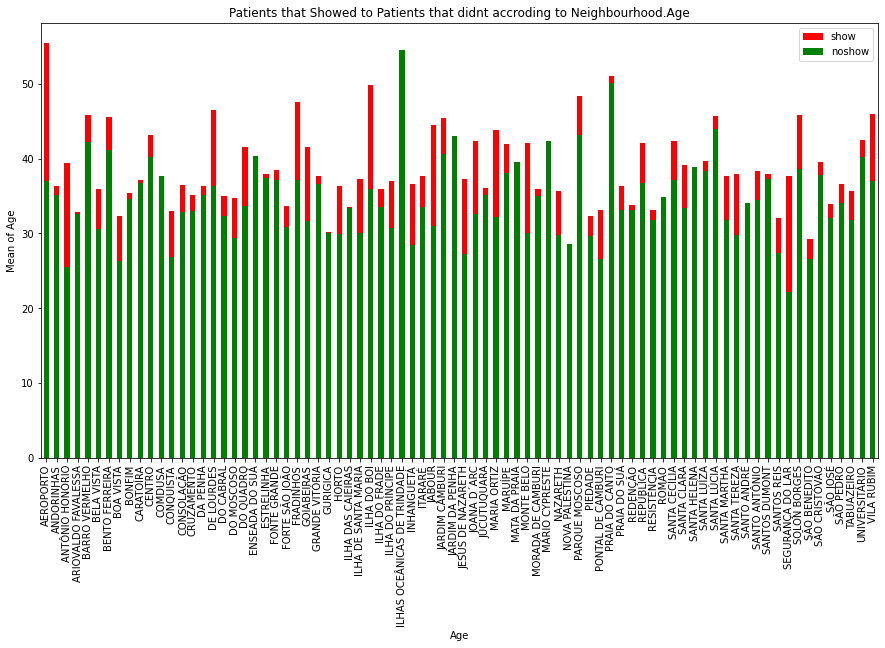

In [224]:
plt.figure(figsize=[15, 8]) 
df[show].groupby('Neighbourhood').Age.mean().plot(kind= 'bar', color ='red', label = 'show')
df[noshow].groupby('Neighbourhood').Age.mean().plot(kind= 'bar', color ='green', label = 'noshow')
plt.legend()
plt.title ('Patients that Showed to Patients that didnt accroding to Neighbourhood.Age')
plt.xlabel('Age')
plt.ylabel('Mean of Age');

As we can see, attendance from some Neighbourhood differ to the Ages, Aeroporto, Ilha Boi and Seguranca Do Lar are the areas with the highest attendance.


<a id='conclusions'></a>
## Conclusions

Neighbourhood have a significant effect on show or noshow, Jaridim Camburi is the greatest number of Patients and also the hightest show rate.

Number of showing patients from neighbourhood affected by SMS receieved and Ages.

Age has effect on the number that show, those Ages 0 through 8 are the significant parents are likely to be responsible for bring them cause they are tender at that age. Ages 45 t0 55 are also high, but from 65 years the attendnce drop significantly.

Surprisingly patients that showed without  receiving SMS are greated than those that showed receiving. they will need to look into some isseusas regard SMS:
***How many SMS do they send, if they send to much or repeatedly that is information overload and can make people not to read it again.

***What is the content of the message sent should be checked.

***They might look into using other means like social media cause people with Smart Phone seem not to check sms etc

## Limitations
Some limitations that I ran into with this data:

Lack of major indices in this dataset is a huge limitation, in making useful conclusions.  In the case of the neighbourhood and SMS received for eaxample, as I stated earlier, it would be better if wen have data on why people came inspite of no SMS with this we will know why the nieghbourhood that didnt come much did so and the moivation of the areas that came. With this it can be used of modified for other nieghbourhoods too.

It is easy to deduce that some neighbourhoods have a tendency to be more noshows, but it is not clear on why that is the case. It could be cultural beliefs to western healthcare, it maybe availblility of alternative medicine, it could be proximity to the hospital cause the areas have different distance to the hospital among other things

Another limitation is that we donot know how many hospitals are avaialbe for all these communities.

Another limitation was the clarity of the data. As you can see, the biggest part of this report is the data cleanup part. That shows the state of the provided data.


We do not have a clear correlation between showing and gender, chronic diseases, nor in enrollment in the welfare


## Submit 

